In [1]:
#Data Preprocessing

In [7]:
import pandas as pd
import os
import glob
from tqdm import tqdm
import json
from sklearn.model_selection import train_test_split
import itertools

print("-------------------------------------------")
print("FINGERPRINTING")
print("-------------------------------------------")


-------------------------------------------
FINGERPRINTING
-------------------------------------------


In [8]:
print("Data Preprocessing. Choose Fingerprinting Method.")
method_number = int(input("1.JA3\n2.nPrint\n"))

Data Preprocessing. Choose Fingerprinting Method.
1.JA3
2.nPrint
1


In [10]:
#JA3 Fingerprinting
if method_number == 1:
    try:
        os.system('mkdir JA3')
    except:
        print("Directory JA3 already exists")
        
    malware_dir = input("Input Directory of Malware Datasets>> ")
    while not os.path.isdir(malware_dir):
        malware_dir = input(f"There is no Dir name {malware_dir}. Check the error and Re-input Directory>> ")
    
    dir_list = os.listdir(malware_dir)
    #print(dir_list)
    for file in dir_list:
        #print(os.path.isdir(file))
        if os.path.isdir(malware_dir+'/'+file):
            os.system(f'mkdir ./JA3/'+file)
    
    pcap_files = glob.glob(os.path.join(malware_dir, '**/*.pcap'), recursive=True)
    
    for pcap in tqdm(pcap_files):
        json_file = pcap.replace('.pcap', '.json')
        json_file = json_file.replace(malware_dir, './JA3')
        os.system(f'ja3 {pcap} --json >> {json_file}')
    # JA3 ML
    json_files = glob.glob(os.path.join('./JA3', '**/*.json'), recursive=True)
    ja3_digest_list = []
    label = []
    ja3_to_list = []
    #print(json_files)
    for j in json_files:
        f = open(j, mode='rt', encoding='UTF-8')
        #label.append(j.split('/')[2])
        data = json.load(f)
        for i in range(len(data)):
            #print(type(data[i]['ja3_digest']))
            ja3_digest = data[i]['ja3_digest']
            l = [int(ja3_digest[k:k+2], 16) for k in range(0, len(ja3_digest), 2)]
            ja3_digest_list.append(l)
            label.append(j.split('/')[2])
            
    #X_train, X_test, y_train, y_test = train_test_split(DATASET, LABEL, test_size=0.2, stratify=LABEL, random_state=0)
        

#nPrint        
elif method_number == 2:
    try:
        os.system('mkdir nPrint')
    except Exception as E:
        print("Directory nPrint already exists")
        
    malware_dir = input("Input Directory of Malware Datasets>> ")
    while not os.path.isdir(malware_dir):
        malware_dir = input(f"There is no Dir name {malware_dir}. Check the error and Re-input Directory>> ")
        
        
    dir_list = os.listdir(malware_dir)
    #print(dir_list)
    for file in dir_list:
        #print(os.path.isdir(file))
        if os.path.isdir(malware_dir+'/'+file):
            os.system(f'mkdir ./nPrint/'+file)
    
    pcap_files = glob.glob(os.path.join(malware_dir, '**/*.pcap'), recursive=True)
    
    for pcap in tqdm(pcap_files):
        npt_file = pcap.replace('.pcap', '.npt')
        npt_file = npt_file.replace(malware_dir, './nPrint')
        #print(pcap)
        os.system(f'nprint -P "{pcap}" -4 -t -p 20 -W "{npt_file}"')

Input Directory of Malware Datasets>> ./Malwares_Datasets


100%|█████████████████████████████████████████| 222/222 [00:44<00:00,  5.00it/s]


In [16]:
# JA3 Ml
os.chdir('../')
dir_list = os.listdir()

In [5]:
json_files = glob.glob(os.path.join('./JA3', '**/*.json'), recursive=True)
ja3_digest_list = []
label = []
ja3_to_list = []
for j in tqdm(json_files):
    f = open(j, mode='rt', encoding='UTF-8')
    #label.append(j.split('/')[2])
    data = json.load(f)
    for i in range(len(data)):
        #print(type(data[i]['ja3_digest']))
        ja3_digest = data[i]['ja3_digest']
        l = [int(ja3_digest[k:k+2], 16) for k in range(0, len(ja3_digest), 2)]
        ja3_digest_list.append(l)
        label.append(j.split('/')[2])

  0%|                                                   | 0/222 [00:00<?, ?it/s]


JSONDecodeError: Extra data: line 12 column 1 (char 351)

In [48]:
ja3_digest_list[0], label[0]

([29, 9, 94, 104, 72, 157, 60, 83, 82, 151, 205, 141, 255, 176, 108, 185],
 'Angler-EK')

In [67]:
import numpy as np
import pandas as pd

In [83]:
col = []
for i in range(0, 16):
    col.append(f'col {i}')
DATASET = np.array(ja3_digest_list)
LABEL = np.array(label)
df_DATASET = pd.DataFrame(DATASET, columns = col)  
df_DATASET['LABEL'] = LABEL

In [85]:
from autogluon.tabular import TabularDataset, TabularPredictor

pred = TabularPredictor(label=y_train).fit(train_data = X_train)

,col 0,col 1,col 2,col 3,col 4,col 5,col 6,col 7,col 8,col 9,col 10,col 11,col 12,col 13,col 14,col 15,LABEL
0,29,9,94,104,72,157,60,83,82,151,205,141,255,176,108,185,Angler-EK
1,29,9,94,104,72,157,60,83,82,151,205,141,255,176,108,185,Angler-EK
2,29,9,94,104,72,157,60,83,82,151,205,141,255,176,108,185,Angler-EK
3,29,9,94,104,72,157,60,83,82,151,205,141,255,176,108,185,Angler-EK
4,29,9,94,104,72,157,60,83,82,151,205,141,255,176,108,185,Angler-EK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,116,146,126,36,45,108,63,235,248,203,156,171,16,167,248,137,Dridex
9966,223,139,252,54,62,235,166,58,185,56,203,33,144,204,215,183,Dridex
9967,223,139,252,54,62,235,166,58,185,56,203,33,144,204,215,183,Dridex
9968,223,139,252,54,62,235,166,58,185,56,203,33,144,204,215,183,Dridex


In [58]:
LABEL = np.array(label)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(DATASET, LABEL, test_size=0.2, stratify=LABEL, random_state=0)

In [86]:
from autogluon.tabular import TabularDataset, TabularPredictor
train_data, test_valid_data = train_test_split(df_DATASET, test_size=0.3, random_state=1)
test_data, valid_data = train_test_split(df_DATASET, test_size=0.5, random_state=1)

In [87]:
pred = TabularPredictor(label='LABEL').fit(train_data = train_data, tuning_data = valid_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20230524_230641/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230524_230641/"
AutoGluon Version:  0.7.0
Python Version:     3.9.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #43~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Fri Apr 21 16:51:08 UTC 2
Train Data Rows:    6979
Train Data Columns: 16
Tuning Data Rows:    4985
Tuning Data Columns: 16
Label Column: LABEL
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	8 unique label values:  ['Zeus', 'Trickbot', 'Hancitor', 'Dridex', 'IcedID', 'Gootkit', 'Rig-EK', 'Angler-EK']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 8
Using Feature Generators to preprocess the

In [89]:
import matplotlib.pyplot as plt
def cmp(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('test_tcp_ipv4_payload.png', dpi=300, bbox_inches='tight')



In [90]:
predictions = pred.predict(test_data)
score = pred.evaluate(test_data)


Evaluation: accuracy on test data: 0.7971915747241726
Evaluations on test data:
{
    "accuracy": 0.7971915747241726,
    "balanced_accuracy": 0.41453986889589056,
    "mcc": 0.685419052440233
}


In [92]:
from sklearn.metrics import accuracy_score, recall_score, f1_score



y_true = pd.Series(test_data['LABEL'].values)
ac = accuracy_score(y_true, predictions)
recall = recall_score(y_true, predictions, average='weighted')
f1 = f1_score(y_true, predictions, average='weighted')
print(ac, recall, f1)



0.7971915747241726 0.7971915747241726 0.7372330075477362


Normalized confusion matrix


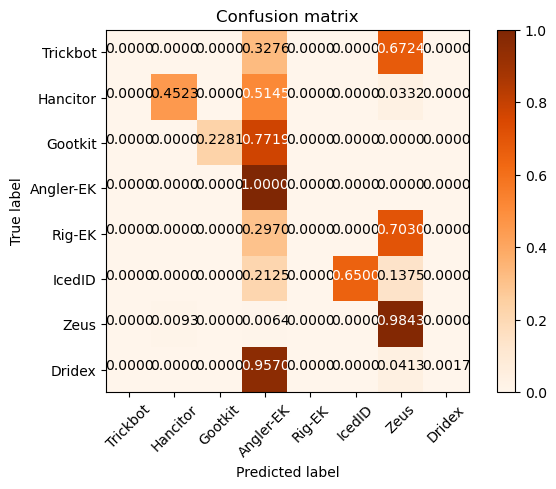

In [95]:


from sklearn.metrics import confusion_matrix
import itertools


cmp(confusion_matrix(y_true, predictions), ['Trickbot', 'Hancitor', 'Gootkit', 'Angler-EK', 'Rig-EK', 'IcedID',
       'Zeus', 'Dridex'], normalize=True, cmap=plt.cm.Oranges)

